# Görselleştirme (Matplotlib + Seaborn)

Bu notebook, görselleştirme için gereken aşağıdaki konuları içerir:

- Matplotlib: line, bar, histogram, scatter
- Seaborn: lineplot, barplot, boxplot, countplot, heatmap
- Basit iş soruları: "Hangi kanal daha iyi?", "ROI nedir?"
- Grafik kaydetme (PNG)


## 1) Kurulum


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

sns.set_theme()
print("Hazir!")


Hazir!


## 2) Veriyi oku

Veri:
- ybs_customers_ascii.csv
- ybs_marketing_ascii.csv

Not: Dosyalar aynı notebook dosyasında olmalı.

In [ ]:
marketing = pd.read_csv("ybs_marketing_ascii.csv", parse_dates=["date"])
customers = pd.read_csv("ybs_customers_ascii.csv")

marketing.head()


,date,channel,region,spend,clicks,conversions,revenue,roi,cpc
0,2025-07-29,Search,Izmir,742.48,455,16,7116.51,9.584783,1.631824
1,2025-07-29,Social,Antalya,874.70,655,12,7533.98,8.613216,1.335420
2,2025-07-29,Email,Istanbul,231.48,281,9,7413.38,32.026007,0.823772
3,2025-07-29,Affiliate,Istanbul,355.05,295,7,2266.75,6.384312,1.203559
4,2025-07-30,Search,Izmir,1018.22,999,39,16489.41,16.194349,1.019239


## 3) Matplotlib: Line Plot (zaman serisi)


Günlük toplam revenue nasıl değişiyor?


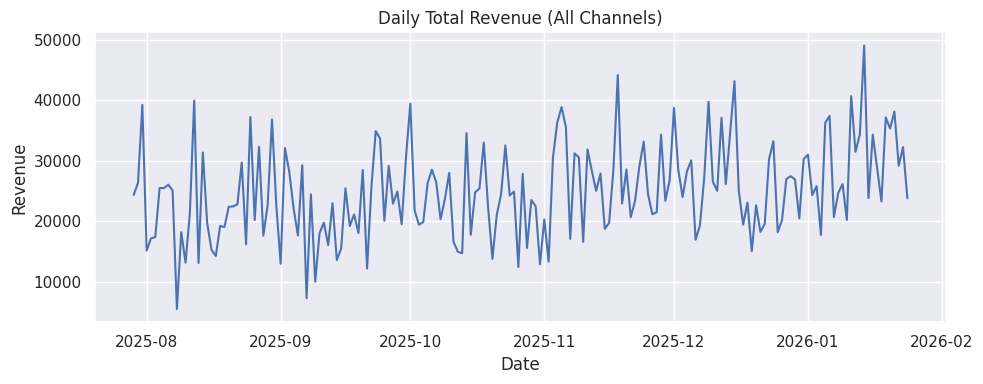

In [ ]:
daily_rev = marketing.groupby("date")["revenue"].sum().reset_index()

plt.figure(figsize=(10,4))
plt.plot(daily_rev["date"], daily_rev["revenue"])
plt.title("Daily Total Revenue (All Channels)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


## 4) Matplotlib: Bar Plot (Kategori Karşılaştırma)


Hangi kanal toplamda daha çok gelir (revenue) getirmiş?

---




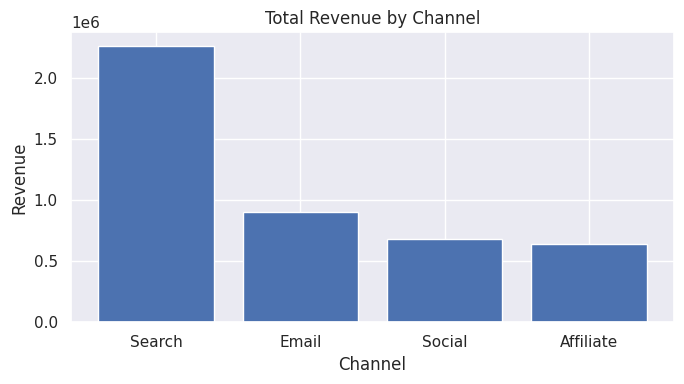

In [ ]:
channel_rev = marketing.groupby("channel")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
plt.bar(channel_rev.index, channel_rev.values)
plt.title("Total Revenue by Channel")
plt.xlabel("Channel")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


## 5) Matplotlib: Histogram (dağılım)


Günlük revenue dağılımını görelim.


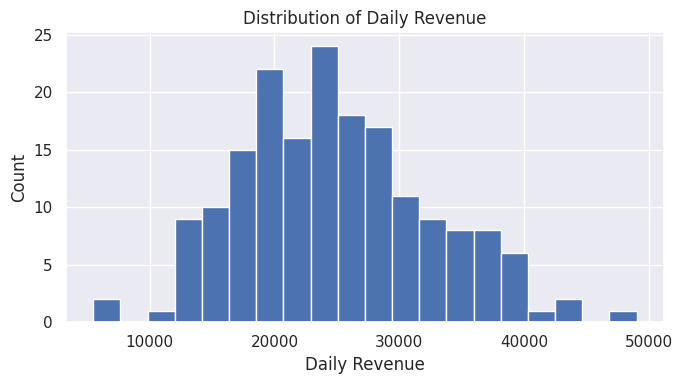

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(daily_rev["revenue"], bins=20)
plt.title("Distribution of Daily Revenue")
plt.xlabel("Daily Revenue")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 6) Matplotlib: Scatter (iki sayısal değişken)


Spend arttıkça revenue artıyor mu? (günlük toplam)


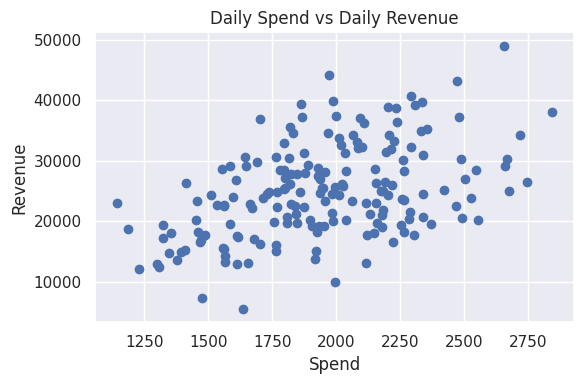

In [ ]:
daily_spend = marketing.groupby("date")["spend"].sum().reset_index()
df_day = daily_rev.merge(daily_spend, on="date")

plt.figure(figsize=(6,4))
plt.scatter(df_day["spend"], df_day["revenue"])
plt.title("Daily Spend vs Daily Revenue")
plt.xlabel("Spend")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


## 7) Seaborn: Daha hızlı grafikler


### 7.1) Lineplot: Kanal bazında revenue trendi


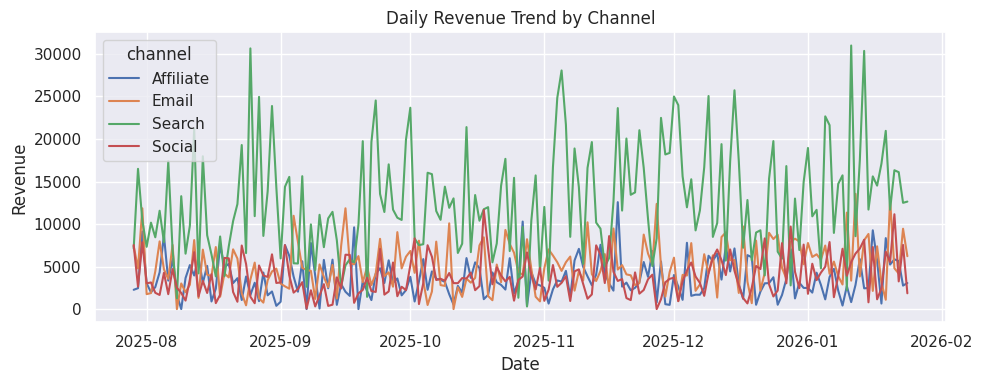

In [ ]:
daily_channel = marketing.groupby(["date","channel"])["revenue"].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=daily_channel, x="date", y="revenue", hue="channel")
plt.title("Daily Revenue Trend by Channel")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


### 7.2) Barplot: Ortalama ROI (kanal bazında)


ROI = revenue / spend. Bu bir verimlilik ölçüsüdür.


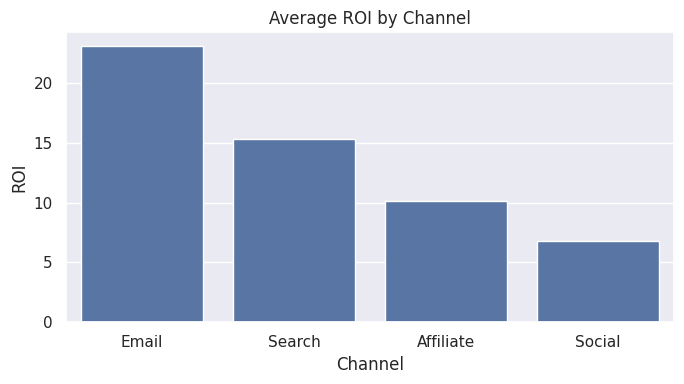

In [ ]:
roi_mean = marketing.groupby("channel")["roi"].mean().reset_index().sort_values("roi", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=roi_mean, x="channel", y="roi")
plt.title("Average ROI by Channel")
plt.xlabel("Channel")
plt.ylabel("ROI")
plt.tight_layout()
plt.show()


### 7.3) Boxplot: ROI dağılımı


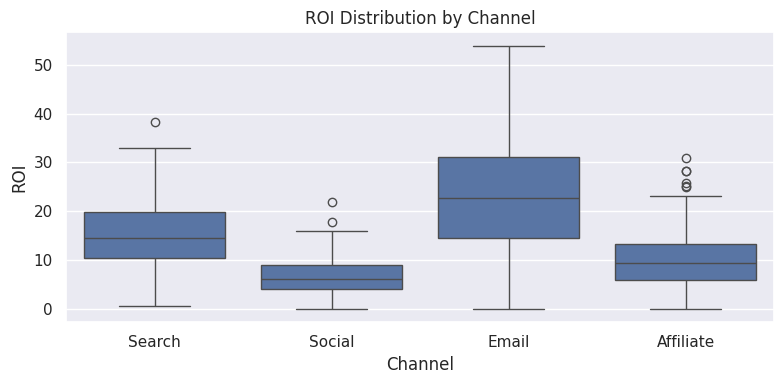

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=marketing, x="channel", y="roi")
plt.title("ROI Distribution by Channel")
plt.xlabel("Channel")
plt.ylabel("ROI")
plt.tight_layout()
plt.show()


### 7.4) Countplot: Region dağılımı


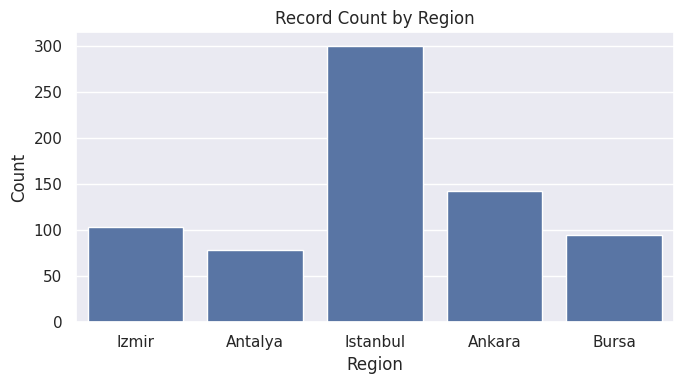

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=marketing, x="region")
plt.title("Record Count by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 8) Customer verisi: Segment analizi


### 8.1) Gelir dağılımı (histplot)


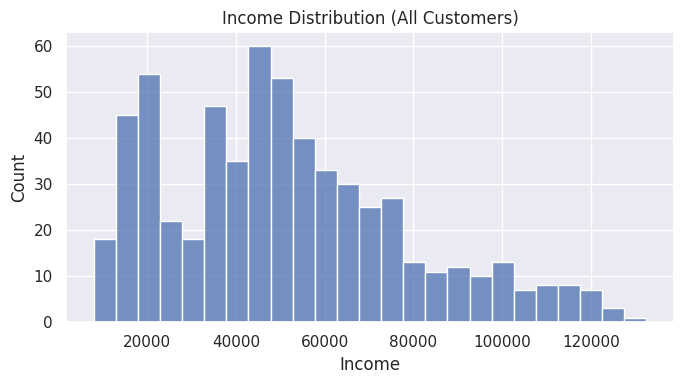

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=customers, x="income", bins=25)
plt.title("Income Distribution (All Customers)")
plt.xlabel("Income")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### 8.2) Income vs Spending Score (scatterplot)


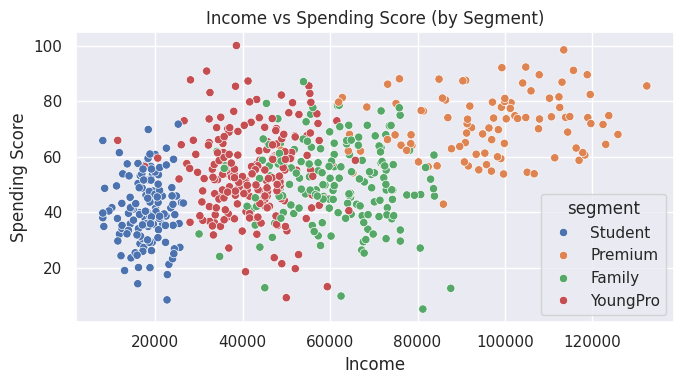

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=customers, x="income", y="spending_score", hue="segment")
plt.title("Income vs Spending Score (by Segment)")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.tight_layout()
plt.show()


### 8.3) Segment bazında ortalama memnuniyet (barplot)


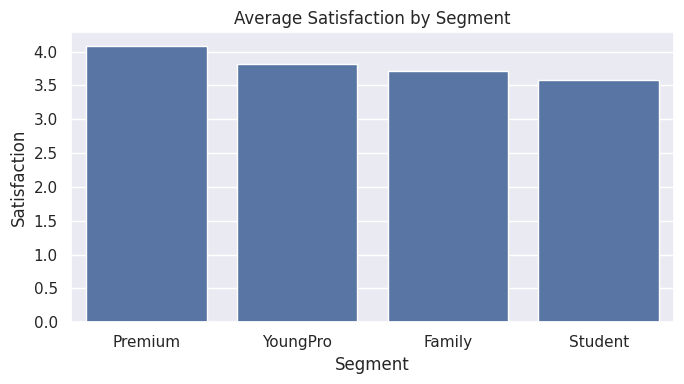

In [ ]:
seg_sat = customers.groupby("segment")["satisfaction"].mean().reset_index().sort_values("satisfaction", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=seg_sat, x="segment", y="satisfaction")
plt.title("Average Satisfaction by Segment")
plt.xlabel("Segment")
plt.ylabel("Satisfaction")
plt.tight_layout()
plt.show()


## 9) Korelasyon Heatmap (Marketing)


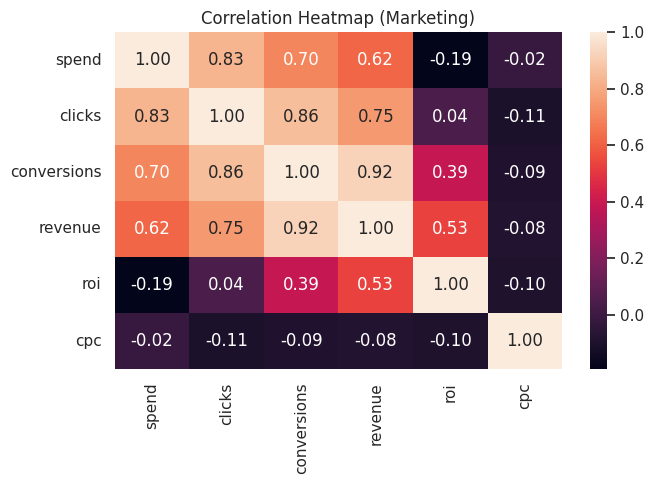

In [ ]:
corr = marketing[["spend","clicks","conversions","revenue","roi","cpc"]].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Marketing)")
plt.tight_layout()
plt.show()


## 10) Grafik kaydetme (PNG)


Kaydedildi: avg_roi_by_channel.png


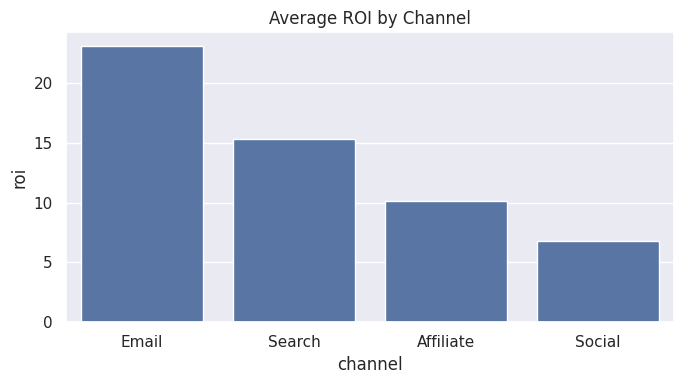

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=roi_mean, x="channel", y="roi")
plt.title("Average ROI by Channel")
plt.tight_layout()

plt.savefig("avg_roi_by_channel.png", dpi=150)
print("Kaydedildi: avg_roi_by_channel.png")
plt.show()
